**PARTE 3**
==

**Ejercicio Obligatorio - Curso Machine Learning UTN**
==
**Alumno: Mariano Raul Vila**

**Profe: MSc. Ing. Enrique Nicanor Mariotti**

Algunas conclusiones de lo trabajado:
==
* En esta segunda parte vamos a trabajar con K -means y mini batch. 
* Previamente se va a escalar y luego aplicar PCA.
* En K - Means se obtuvo un score de 0.9. En cambio, si modifico el n de clusters el score disminuye bastante. 

LIBRERIAS
==

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Datasets
# ==============================================================================
from sklearn import datasets

# Preprocesado
# ==============================================================================
from sklearn.model_selection import train_test_split #separo datos entrenamiento
from sklearn import preprocessing  #estandarización
from sklearn.preprocessing import scale #escalamiento 
from sklearn.preprocessing import minmax_scale #escalamiento
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #análisis de componentes principales
import mglearn
from sklearn import model_selection

# Algoritmo
# ==============================================================================
#aprendizaje supervisado
#Regresión Lineal.
#Clasificación – Regresión logística.
from sklearn import neighbors #knn vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier #knn vecinos cercanos
from sklearn.tree import DecisionTreeClassifier #arboles

#aprendizaje NO supervisado
from sklearn.cluster import KMeans #k means
from sklearn.cluster import MiniBatchKMeans #mini batch

# Evaluar el modelo
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score #area bajo la curva
from sklearn import metrics
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

#import sys !{sys.executable} -m pip install mglearn Usado para instalar mglear

DATASET
==

In [2]:
from sklearn.datasets import load_wine

#DATASET
dataset = load_wine()

#Exploramos el dataset
dataset.keys()

#Crearemos un dataframe
datos=dataset.data
etiquetas=dataset.target
df=pd.DataFrame(datos, columns=dataset.feature_names)

In [3]:
#vemos info de cada campo del df. No se observan valores nulos en ninguno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

ESCALAMIENTO PREVIO
==

In [4]:
scaler = StandardScaler()
X_1=scaler.fit_transform(datos)

In [5]:
datos, X_1

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
          1.84791957,  1.01300893],
        [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
          1.1134493 ,  0.96524152],
        [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
          0.78858745,  1.39514818],
        ...,
        [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
         -1.48544548,  0.28057537],
        [ 0.20923168,  0

PCA
==

(178, 13)
(178, 2)


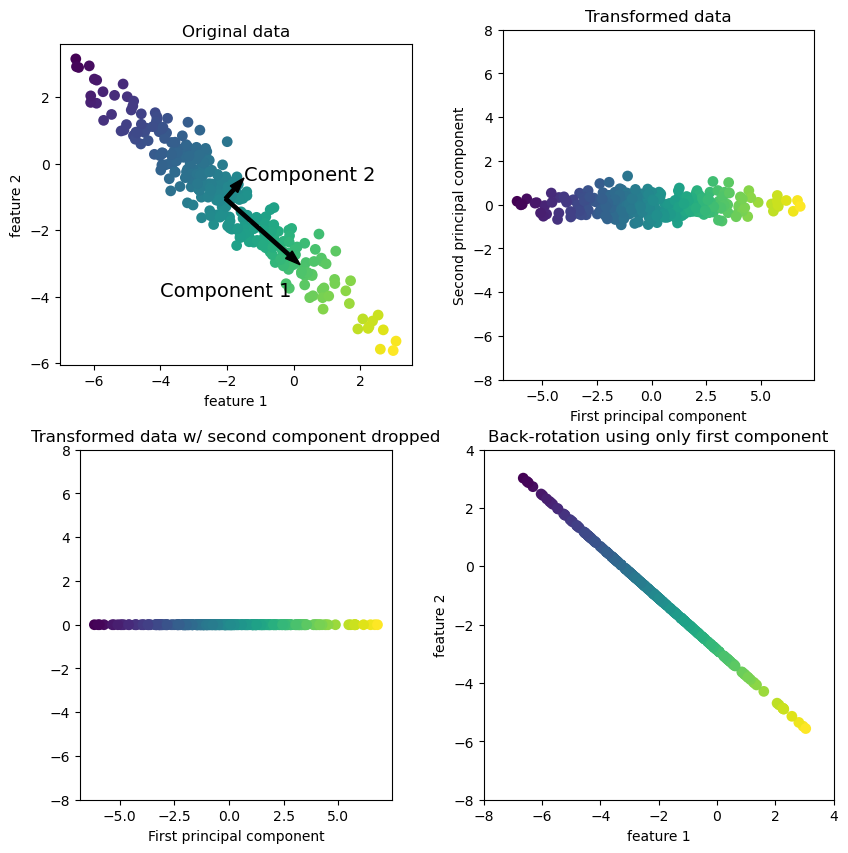

In [6]:
#X = np.array(df[[ 'proline','alcohol']])
#y = np.array(dataset.target)

mglearn.plots.plot_pca_illustration()

#creamos el modelo
pca=PCA(n_components=2)

#Para ajustar con nuestra matriz de datos por features hacemos
pca.fit(X_1)

transformada=pca.transform(X_1)

print(X_1.shape)
print(transformada.shape)

In [7]:
transformada

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

K MEANS
==

Score:  0.91


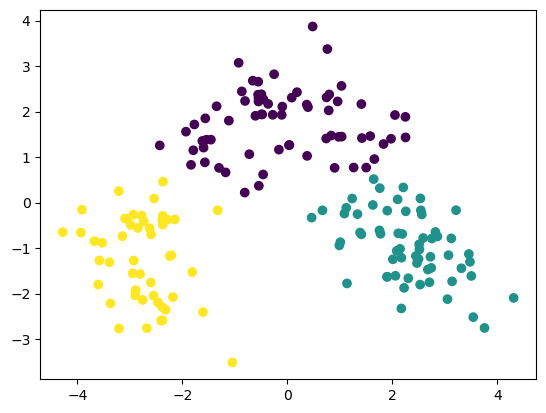

In [8]:

# X_1 es donde tengo los datos escalados
# datos=dataset.data
# etiquetas=dataset.target

#n_clusters es la cantidad de grupos que queremos
#con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = KMeans(n_clusters=3, max_iter=2000) 
k_means.fit(transformada)

#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(transformada)

#print(predicciones)
#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)

#El resultado es un 73% lo cual no es muy bueno
print('Score: ',round(score,2))
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones) #aqui colores según las predicciones

plt.show()


MiniBatch
==

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0.8617967592137037


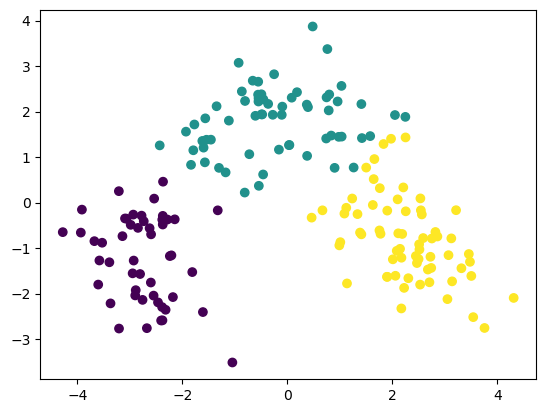

In [10]:

#n_clusters es la cantidad de grupos que queremos
#con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = MiniBatchKMeans(n_clusters=3, max_iter=2000) 
k_means.fit(transformada)

#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(transformada)

#print(predicciones)
#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)

#El resultado es un
print(score)
plt.scatter(transformada[:, 0], transformada[:, 1], c=predicciones)

plt.show()